In [15]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [16]:
rain_minimum = 1.0
rain_maximum = 250.0
rain_step = 1.0
spd = 86400.0
sph = 3600.0
mpy = 30.4167

nrainbin = int((rain_maximum-rain_minimum)/rain_step) + 1

rain_pdf = np.linspace(rain_minimum,rain_maximum, num=nrainbin, endpoint=True)
rain_bin = np.zeros((nrainbin-1))


In [17]:

pr = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/trm/MonthlyTRMM_3B43/3B43.1998_2008.nc')

pr




<xarray.Dataset>
Dimensions:  (time: 132, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2008-12-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 ...
    datesec  (time) timedelta64[ns] ...
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [18]:

#interpolating to new lat and lon

#new_lon = np.arange(85,94,0.5)
#new_lat = np.arange(17,28,0.5)
#pr = pr.interp(latitude=new_lat,longitude=new_lon)
#pr


In [19]:
pr = pr.sel(time=slice('1980-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))


In [20]:
pr= pr.sel(lon=slice(86,94),lat=slice(18,27))
pr

<xarray.Dataset>
Dimensions:  (time: 132, lat: 36, lon: 32)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2008-12-01
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 26.12 26.38 26.62 26.88
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
Data variables:
    date     (time) int32 19980101 19980201 19980301 ... 20081101 20081201
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [21]:
size = pr.precip.shape
print(size)


(132, 36, 32)


In [22]:
for time in range(size[0]):
        data = pr.precip[time,Ellipsis] * sph
        nzd  = data.values[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin = rain_bin + hist[0]

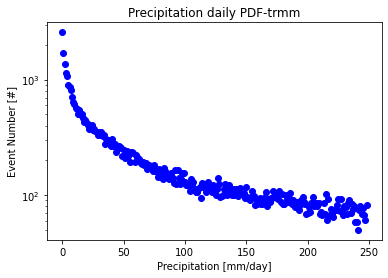

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(rain_bin, 'bo')
ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('Precipitation [mm/day]')
plt.ylabel('Event Number [#]')
plt.title('Precipitation daily PDF-trmm')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/pdf_trmm.png")



plt.show( )